In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Levenshtein

In [13]:
# Load the files
experiment_names, dfs, failed_dfs = [], [], []
for file_name in sorted(os.listdir()):
    if 'analysis' not in file_name and 'failed' not in file_name:
        experiment_names.append(file_name[: -4])

for name in experiment_names:
    dfs.append(pd.read_csv(f'{name}.csv'))
    failed_dfs.append(pd.read_csv(f'{name}_failed.csv'))


In [14]:
# %Failed
for idx, name in enumerate(experiment_names):
    print(name)
    print(f'#Success: {len(dfs[idx])}, #Failed {len(failed_dfs[idx])}, {len(dfs[idx]) / (len(dfs[idx]) + len(failed_dfs[idx]))}')

20-d12_clare_aggregated_cs-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0_gpt10.0_sbert0.9
#Success: 2263, #Failed 7, 0.9969162995594714
20-d12_clare_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0_gpt10.0_sbert0.9
#Success: 18980, #Failed 2, 0.9998946370245496
20-d12_faster_genetic_aggregated_cs-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0_gpt10.0_sbert0.9
#Success: 1444, #Failed 847, 0.6302924487123527
20-d12_faster_genetic_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0_gpt10.0_sbert0.9
#Success: 17356, #Failed 256, 0.9854644560526914
20-d12_input_reduction_aggregated_cs-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0
#Success: 2174, #Failed 117, 0.9489305979921432
20-d12_input_reduction_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0
#Success: 18274, #Failed 717, 0.9622452740771945
bertscore_clare_aggregated_cs-en_bertscore_bertscore_down_1.0_gpt10.0_sbert0.9
#Success: 2291, #Failed 0, 1.0
bertscore_clare_aggregated_de-en_bertscore_bertscore_

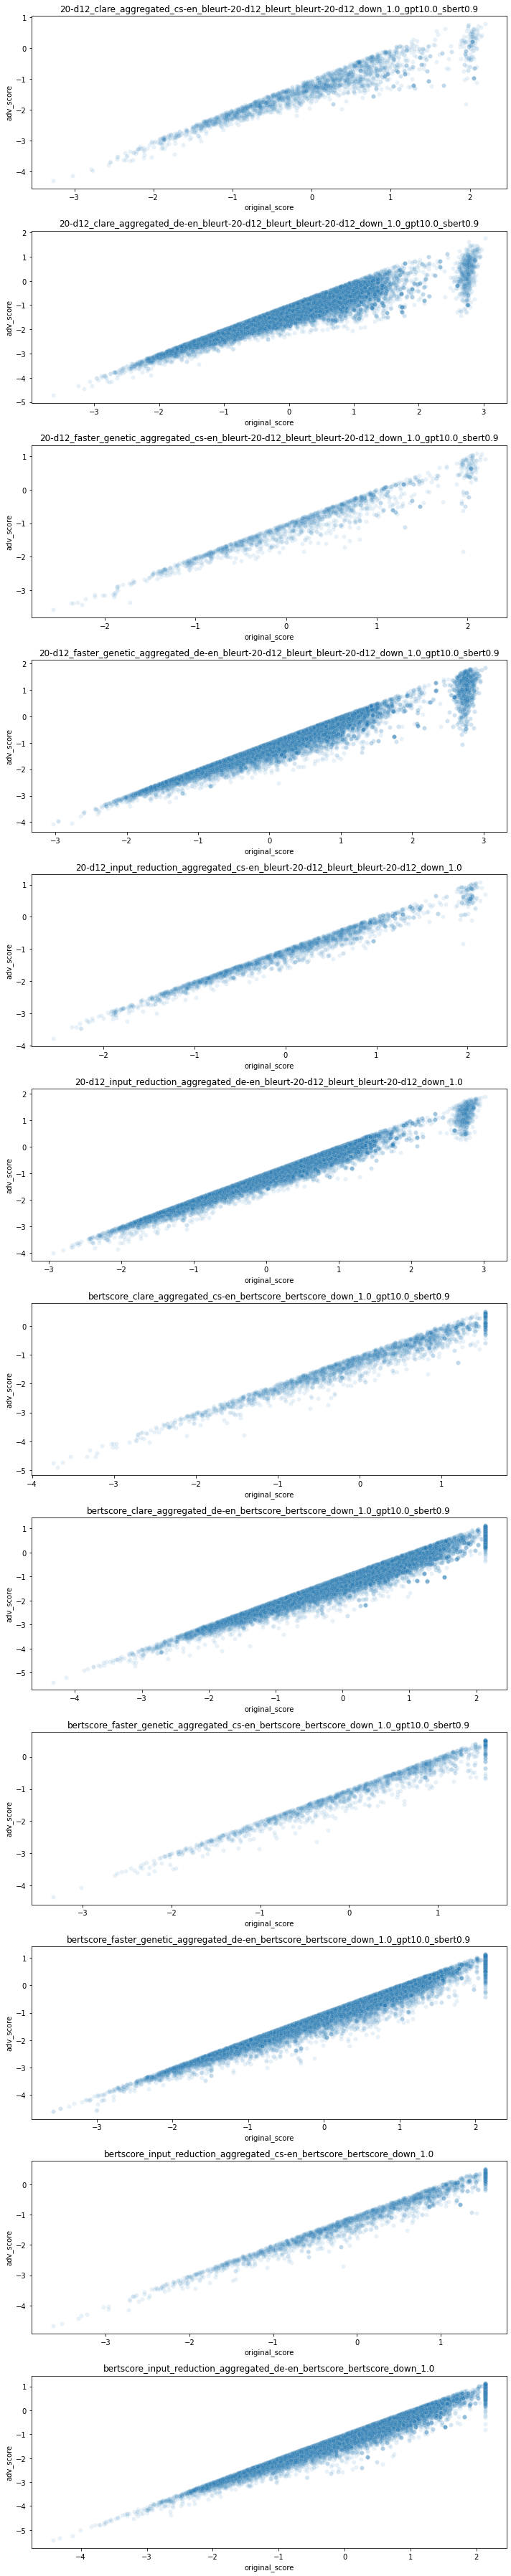

In [16]:
# Score distribution (before, after)
fig, axs = plt.subplots(len(experiment_names), 1, figsize = (10, 50), sharex = False, sharey = False)

for idx, name in enumerate(experiment_names):
    axs[idx].set_title(name)
    sns.scatterplot(ax = axs[idx], x = dfs[idx]['original_score'], y = dfs[idx]['adv_score'], alpha = 0.1)

fig.tight_layout()
plt.show()

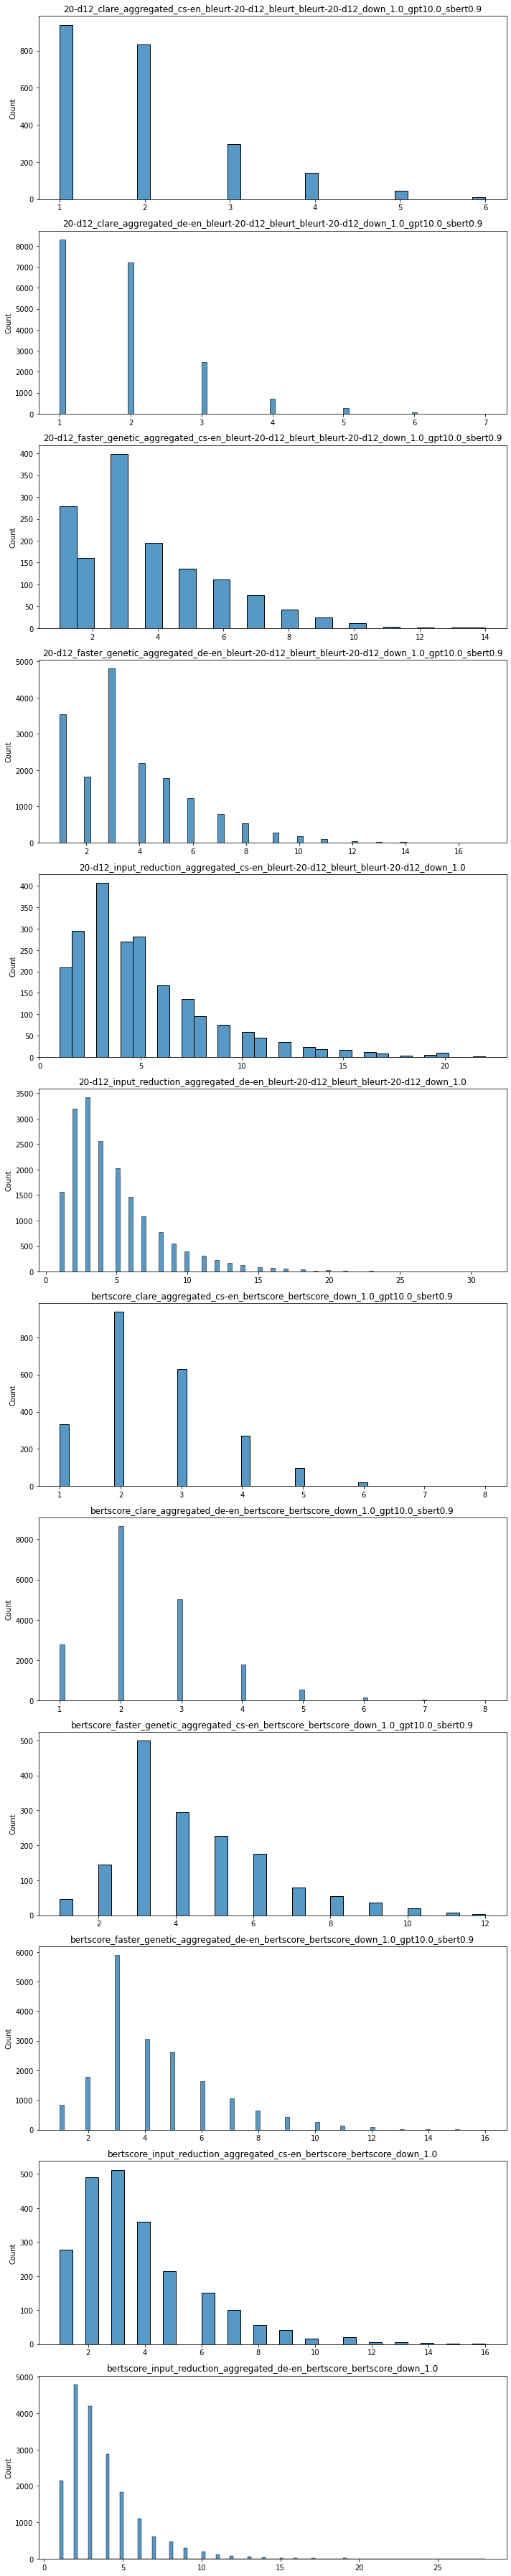

In [17]:
# Edit distance
def get_edit_dist(df):
    out = []
    for line_idx in range(len(df)):
        mt = df['mt'][line_idx]
        adv = df['adv'][line_idx]
        dist = Levenshtein.distance(mt.split(' '), adv.split(' '))
        out.append(dist)
    return out

fig, axs = plt.subplots(len(experiment_names), 1, figsize = (10, 50), sharex = False, sharey = False)

for idx, name in enumerate(experiment_names):
    axs[idx].set_title(name)
    dist = get_edit_dist(dfs[idx])
    sns.histplot(dist, ax = axs[idx])

fig.tight_layout()
plt.show()